## Data Augmentation

Data augmentation on images would include transformations like:

- Flipping H or V
- Rotating
- Zooming in or out 
- Changing color
- Cropping it

Reasons:

- Simply to have access to more data 
- Reduce overfitting

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
gen = ImageDataGenerator(rotation_range=10,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.15,
                         zoom_range=0.1,
                         channel_shift_range=10.,
                         horizontal_flip=True   )

In [6]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog/'))

In [7]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [8]:
assert os.path.isfile(image_path)

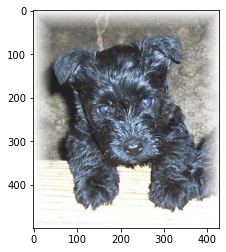

In [9]:
#obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [10]:
#generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [11]:
#get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

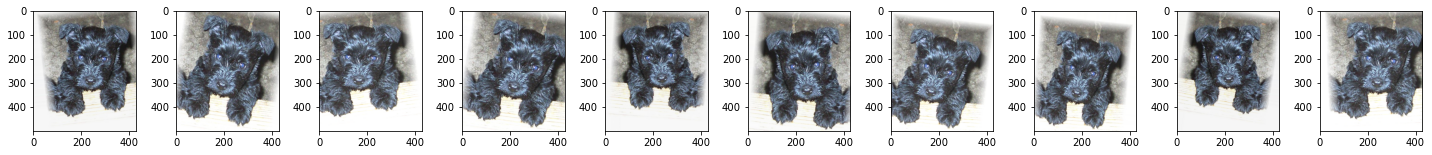

In [13]:
#augmented images
plotImages(aug_images)